In [1]:
import sys
import os
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Add the project root to system path so we can import 'src'
sys.path.append(os.path.abspath('..'))

from src.data_loader import fetch_and_process, fetch_portfolio_data
from src.regime import get_regime_states

# Load Config
with open("../config.yaml", "r") as f:
    config = yaml.safe_load(f)
    
# Set visual style
sns.set_style("whitegrid")

In [2]:
# 1. Fetch Market Data (SPY)
print("Fetching Market Data...")
spy_df = fetch_and_process(config['data']['market_ticker'], 
                           config['data']['start_date'], 
                           config['data']['end_date'])

# 2. Run Regime Detection
spy_df = get_regime_states(spy_df)

print("Regime Counts:")
print(spy_df['regime'].value_counts())

Fetching Market Data...
Fitting HMM with 3 states...
Regime Counts:
regime
0    1665
2     570
1      19
Name: count, dtype: int64


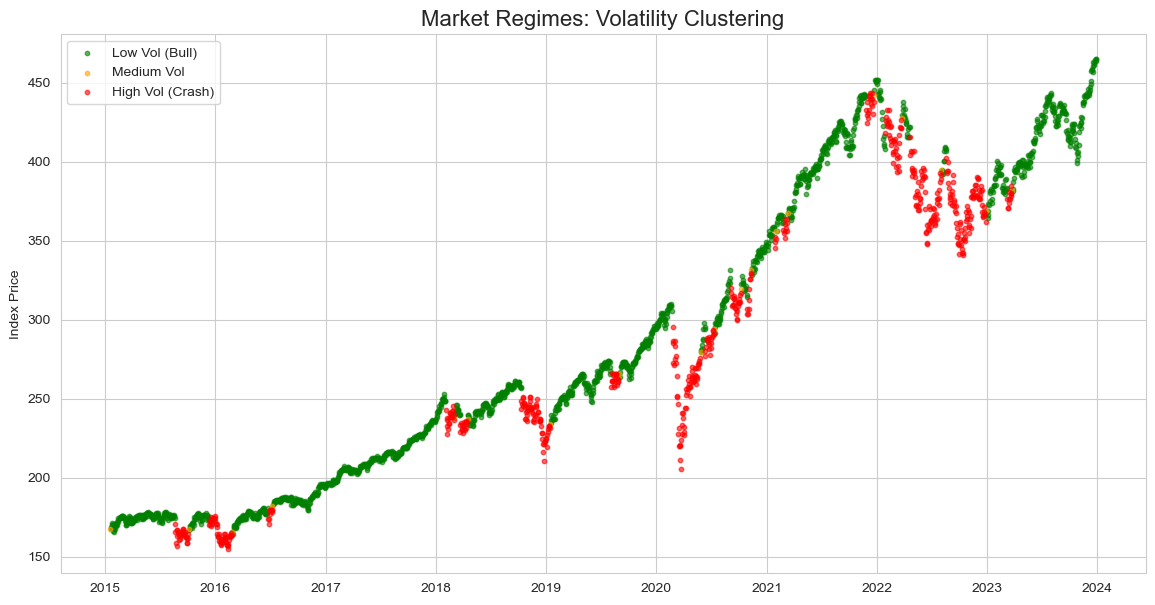

In [3]:
def plot_regimes(df):
    plt.figure(figsize=(14, 7))
    
    # Define colors: 0=Green (Bull), 1=Yellow (Sideways), 2=Red (Bear)
    colors = {0: 'green', 1: 'orange', 2: 'red'}
    labels = {0: 'Low Vol (Bull)', 1: 'Medium Vol', 2: 'High Vol (Crash)'}
    
    for regime in [0, 1, 2]:
        subset = df[df['regime'] == regime]
        plt.scatter(subset.index, subset['price'], 
                    c=colors[regime], label=labels[regime], s=10, alpha=0.6)
    
    plt.title("Market Regimes: Volatility Clustering", fontsize=16)
    plt.ylabel("Index Price")
    plt.legend()
    plt.show()

plot_regimes(spy_df)

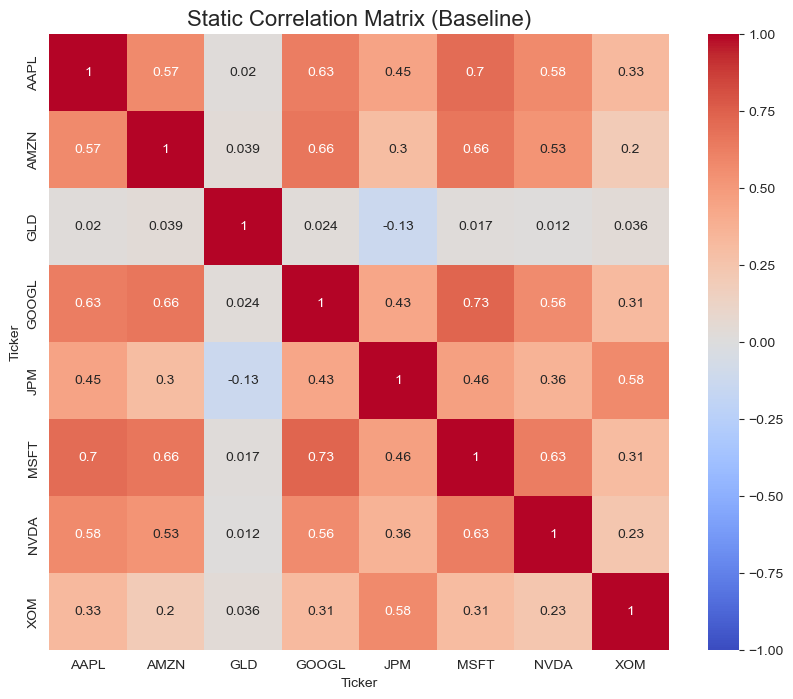

In [4]:
# Fetch Portfolio Data
tickers = config['data']['portfolio_tickers']
portfolio_rets = fetch_portfolio_data(tickers, config['data']['start_date'], config['data']['end_date'])

# Compute Correlation Matrix
corr_matrix = portfolio_rets.corr()

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Static Correlation Matrix (Baseline)", fontsize=16)
plt.show()